In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('/Users/joy/cakd3/visualization/examples/tips.csv')
tips.head()

#total_bill : 전체가격 
#tip : 팁 
#smoker : 흡연여부
#day : 요일 
#time : 오전 / 오후 
#size : 테이블 사이즈

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#### 참고 
https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [2]:
import seaborn as sns
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
t_df = sns.load_dataset('titanic')
#상관관계 보기 
t_df[['pclass', 'age','fare','survived']].corr() 

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

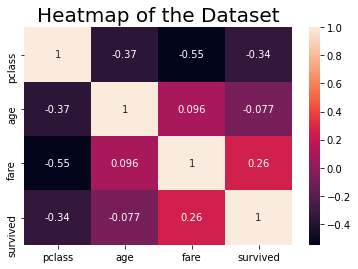

In [6]:
#히트맵 보기 
#annotation : 주석
sns.heatmap(t_df[['pclass', 'age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset', fontsize=20)

In [7]:
#피벗테이블 만들어서 히트맵 보기 
table = t_df.pivot_table(index=['sex'], columns=['class'],values=['survived'],
                        aggfunc='mean')

table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

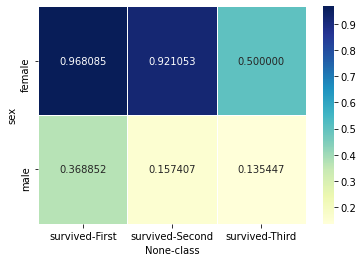

In [12]:
sns.heatmap(table,
           annot=True,
           fmt='f', #소수점 실수
           cmap='YlGnBu', #YlGnBu 영어 소문자 L 임
           linewidth=.5,
           cbar=True) 


#색이 진할 수록 상관관계가 높다

#히트맵 색깔 

'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn

# 0728

###### 빈도표 그리기
 * 주로 카테고리 형태 데이터를 만들 때 쓴다 


In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#빈도표는 crosstab을 사용 

party_count = pd.crosstab(tips['day'], tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [17]:
#피벗테이블 만들기
pd.pivot_table(index = 'day',columns='size',values='tip',aggfunc='count',data=tips).fillna(0).astype(int)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [18]:
pd.pivot_table(index='day', columns='size',values='total_bill', aggfunc='count', fill_value=0, data=tips)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [20]:
pc_25 = party_count.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [22]:
#pc_25의 컬럼들의 합 
pc_25.sum()

#pc_25의 행방향 합 
pc_25.sum(1)

#sum() > 열방향 계산
#sum(1) > 행방향 계산

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [28]:
#pc_25 각 열방향 합계 1로 정규화
# 각 원소를 합계로 나눠야 함 
# pc_25.apply(lambda x : x/x.sum())
pc_25.apply(lambda x : x/x.sum(), axis=1)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [29]:
#각 컬럼의 합계가 1이다 
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [31]:
#요일별 팁의 비중을 시각화 
#계산 방식 : 전체구매액과 tip을 계산 


   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

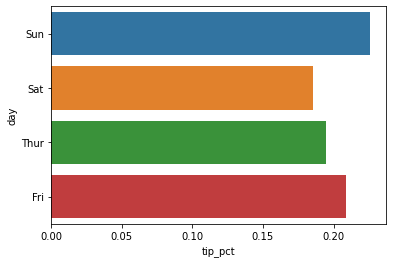

In [19]:
# 전체에서 tip의 비중을 계산

import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) 
print(tips.head())

# sns.barplot(x='tip_pct', y='day', data=tips, orient='h') 
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci=None) 
# seaborn에서는 orient='h'하면 막대그래프가 나옴 
# ci=None입력 시, 신뢰구간을 의미하는 바 모양이 나옴
#바 모양 : 신뢰구간을 의미 

<AxesSubplot:ylabel='day'>

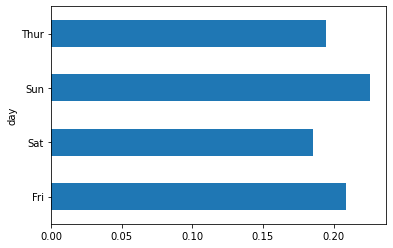

In [20]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.groupby('day').tip_pct.mean().plot(kind = 'barh')

<AxesSubplot:ylabel='day'>

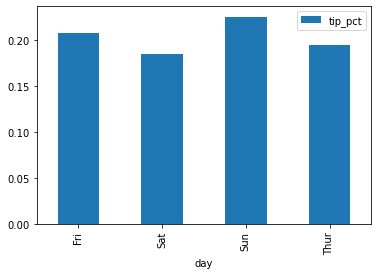

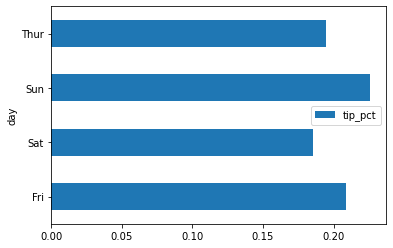

In [43]:
tips.pivot_table('tip_pct','day').plot.bar()
tips.pivot_table('tip_pct','day').plot.barh()

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

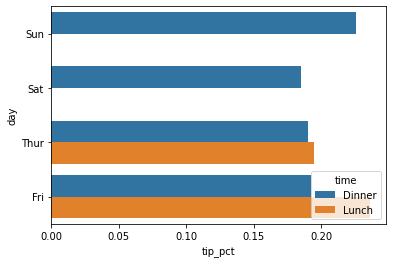

In [22]:
# 점심, 저녁시간 구분 
# tips테이블 > time 점심 저녁 시간 구분 있음 
# hue는 세부 항목을 구분 해주는 역할 
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', ci=None)

<AxesSubplot:xlabel='size', ylabel='count'>

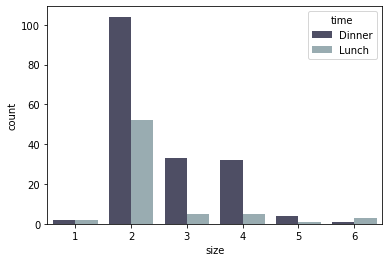

In [63]:
#countplot()
#개수를 세어주는 그래프 
# y축에는 무조건 count가 들어간다 
# x축에는

import warnings
warnings.filterwarnings('ignore')

sns.countplot('size', data=tips, hue='time', palette='bone')

In [65]:
# 정규분포 난수 만들기 
#np.random.normal(loc, scale, size) 
#loc : 평균 # scale : 표준편차, #size : 샘플 개수 

comp1 = np.random.normal(0,1, size=200)
comp2 = np.random.normal(10,2, size=200)

#comp1, comp2 행방향으로 결합
#열로 합치려면 axis=1 설정 필요
values = pd.Series(np.concatenate([comp1, comp2]))
values 

0       0.799888
1      -1.744519
2      -1.690062
3       0.621616
4       1.120695
         ...    
395     6.540471
396     7.395758
397    11.902674
398    12.752244
399    13.106820
Length: 400, dtype: float64

In [66]:
values.describe()


count    400.000000
mean       5.053229
std        5.292854
min       -2.069069
25%       -0.040679
50%        3.939331
75%       10.047530
max       17.041507
dtype: float64

<AxesSubplot:ylabel='Density'>

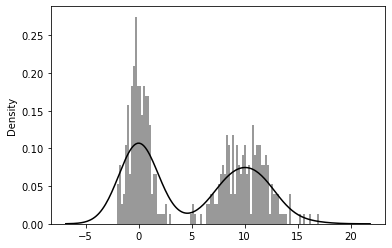

In [67]:
# distplot >> 히스토그램과 곡선그래프(확률밀도함수)가 같이 나옴 
sns.distplot(values, bins=100, color='k')


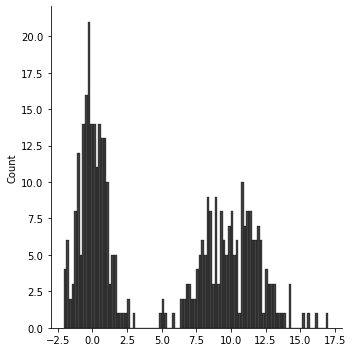

In [68]:
# displot >> hist와 비슷
sns.displot(values, bins=100, color='k')

<AxesSubplot:ylabel='Count'>

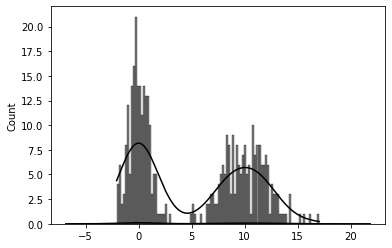

In [72]:
sns.histplot(values, bins=100, color='k', kde=True) 
sns.distplot(values, bins=100, color='k', kde=True)

#kde=True 곡선그래프(확률밀도함수) 나오게 설정한 것
#kde=False 설정 시 곡선그래프(확률밀도함수) 안 나옴 

<AxesSubplot:>

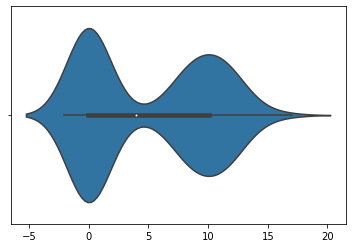

In [96]:
#바이올린플랏으로 만들기 
#values 시리즈 난수로 만든거 이용해서 data가 뭔지 정의하지 않아도 그려짐
sns.violinplot(values)

In [73]:
import pandas as pd 
fish_multi = pd.read_csv('/Users/chuka/Desktop/cakd3/visulalization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

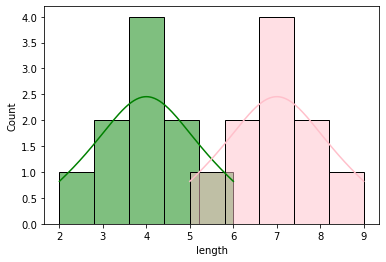

In [88]:
#query로 species A, B 분류 후 legnth로 표시 
length_a = fish_multi.query('species == "A"')['length'] #밖이 홑따옴표이면 안은 쌍따옴표 써야함
length_b = fish_multi.query('species == "B"')['length'] 
sns.histplot(length_a, bins=5, color='g', kde=True)
sns.histplot(length_b, bins=5, color='pink', kde=True)

#막대그래프는 데이터의 밀집도를 알 수 있다 
#데이터의 밀집도를 커널 밀도 추정이라고 한다 

<AxesSubplot:xlabel='species', ylabel='length'>

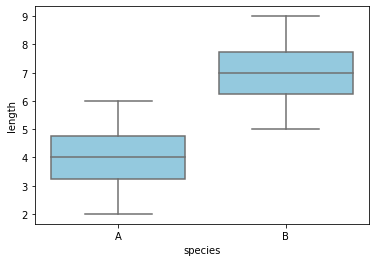

In [87]:
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')
#박스플랏은 데이터 분포는 알 수 있으나 밀집도는 모른다

In [90]:
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

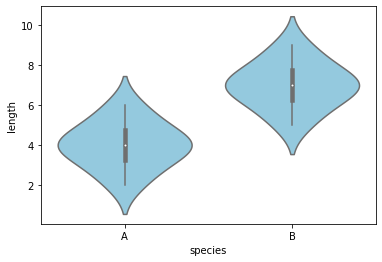

In [94]:
#바이올린 플랏 
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

#바이올린 플랏은 막대그래프를 옆으로 뒤집어 놓은 형태 
#boxplot의 일종
#커널 밀도 추정의 결과를 y축방향으로 추가하여 데이터가 퍼져있는 분산 정도 파악 
#밀집도를 알 수 있으며 a는 4에 밀집, b는 8에 밀집 되어있다는 것을 알 수 있다 

In [23]:
cov_data=pd.read_csv('/Users/joy/cakd3/stat/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


/Applications/anaconda3/envs/cakd3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


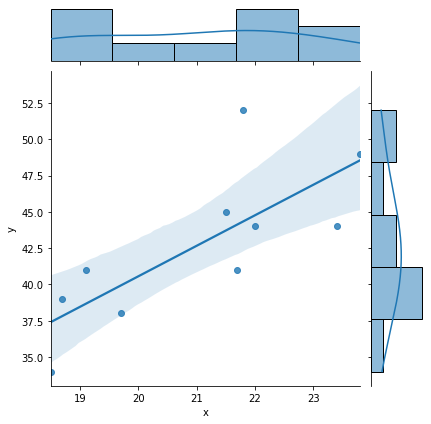

In [24]:
#jointplot : 산점도 그래프 
sns.jointplot(cov_data.x, cov_data.y, kind='reg') #kind='reg'회귀선 설정 (reg:regression : 회귀)
#회귀선 : 점(각각의 데이터)들과 선이 떨어져있는 것(오차)을 보여주는 것 (그래프 안에 있는 직선)
#회귀선은 가장 신뢰할 수 있는 구간을 선으로 나타낸 것! 

In [25]:
#표 크기 조정 
fig = plt.figure(figsize=(3,2))

<Figure size 216x144 with 0 Axes>

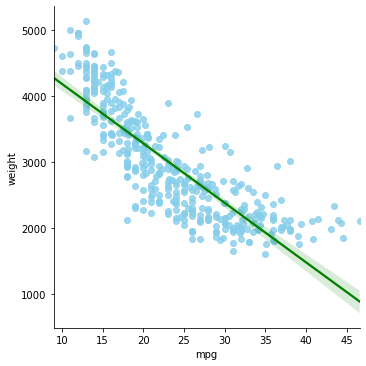

In [111]:
#Lineplot

df_auto = pd.read_csv('/Users/chuka/Desktop/cakd3/dataset/auto-mpg.csv')
df_auto

#mpg와 weight의 lineplot그리기 
#l(영어 L)mplot
#색을 딕셔너리로 설정 가능
#scatter_kws=={'color':'skyblue'} : 점을 skyblue색으로
#line_kws={'color':'green'} : 선을 초록색으로
sns.lmplot(x='mpg', y='weight', data=df_auto, scatter_kws={'color':'skyblue'},
          line_kws={'color':'green'})


# 라인그래프는 시간에 따라 변화하는 모양을 나타내는 데 편리
# 예) 영화명 "블랙 팬서"의 일별 매출액 선 그래프

<AxesSubplot:xlabel='mpg', ylabel='weight'>

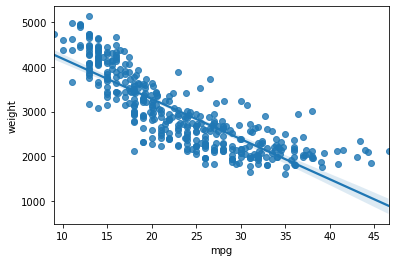

In [113]:
#regplot

#fit_reg=False 회귀선 삭제
#scatter plot만 그려지는 코드
#sns.regplot(x='mpg', y='weight', data=df_auto, fit_reg=False)
sns.regplot(x='mpg', y='weight', data=df_auto)

#regplot : 회귀직선을 의미
#라인그래프와 기능은 같음

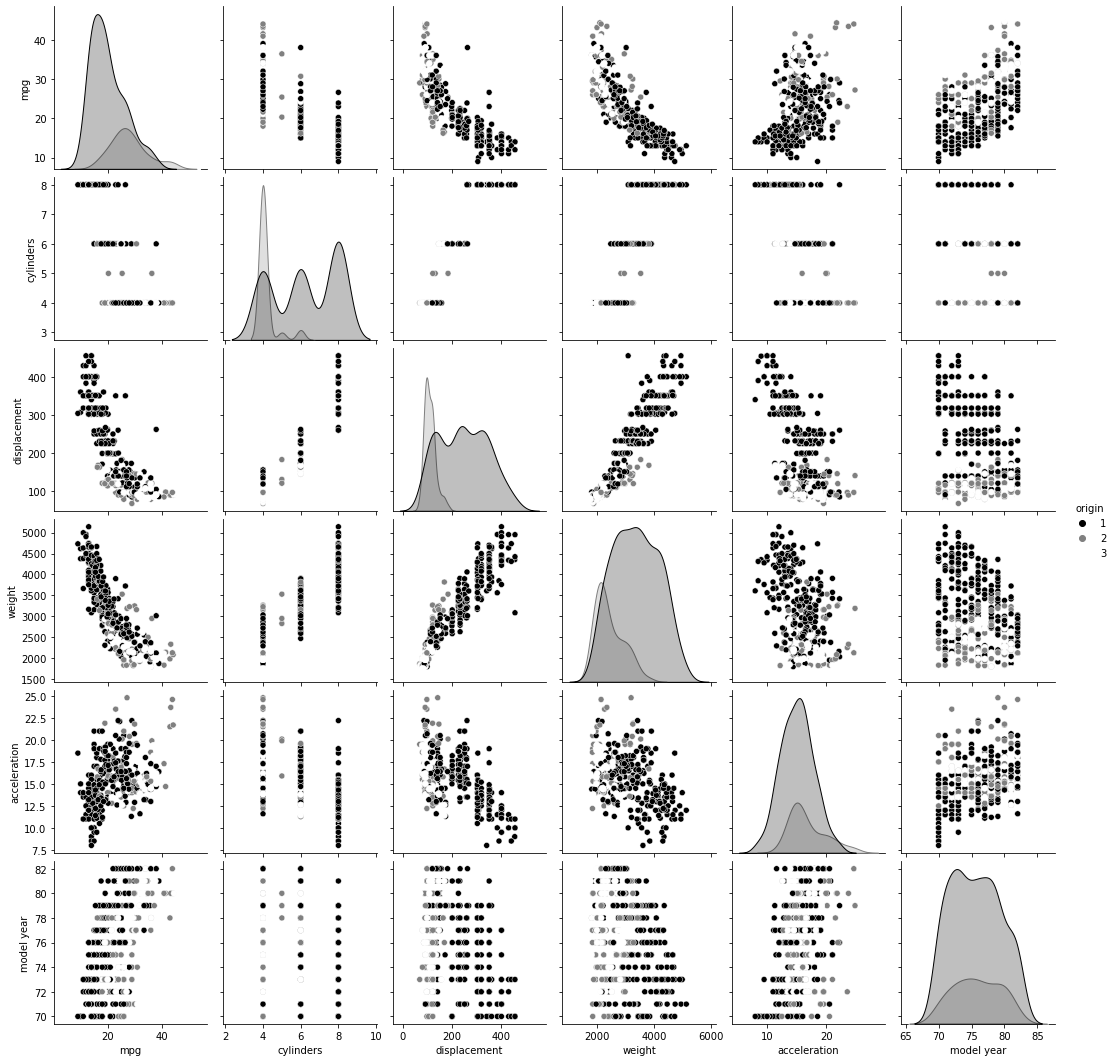

In [115]:
sns.pairplot(df_auto, hue='origin', palette='gray')
#palette 설정을 위해서는 hue 설정이 필요
#hue는 컬럼 등으로 구분해 주는 역할 (세부 분류)

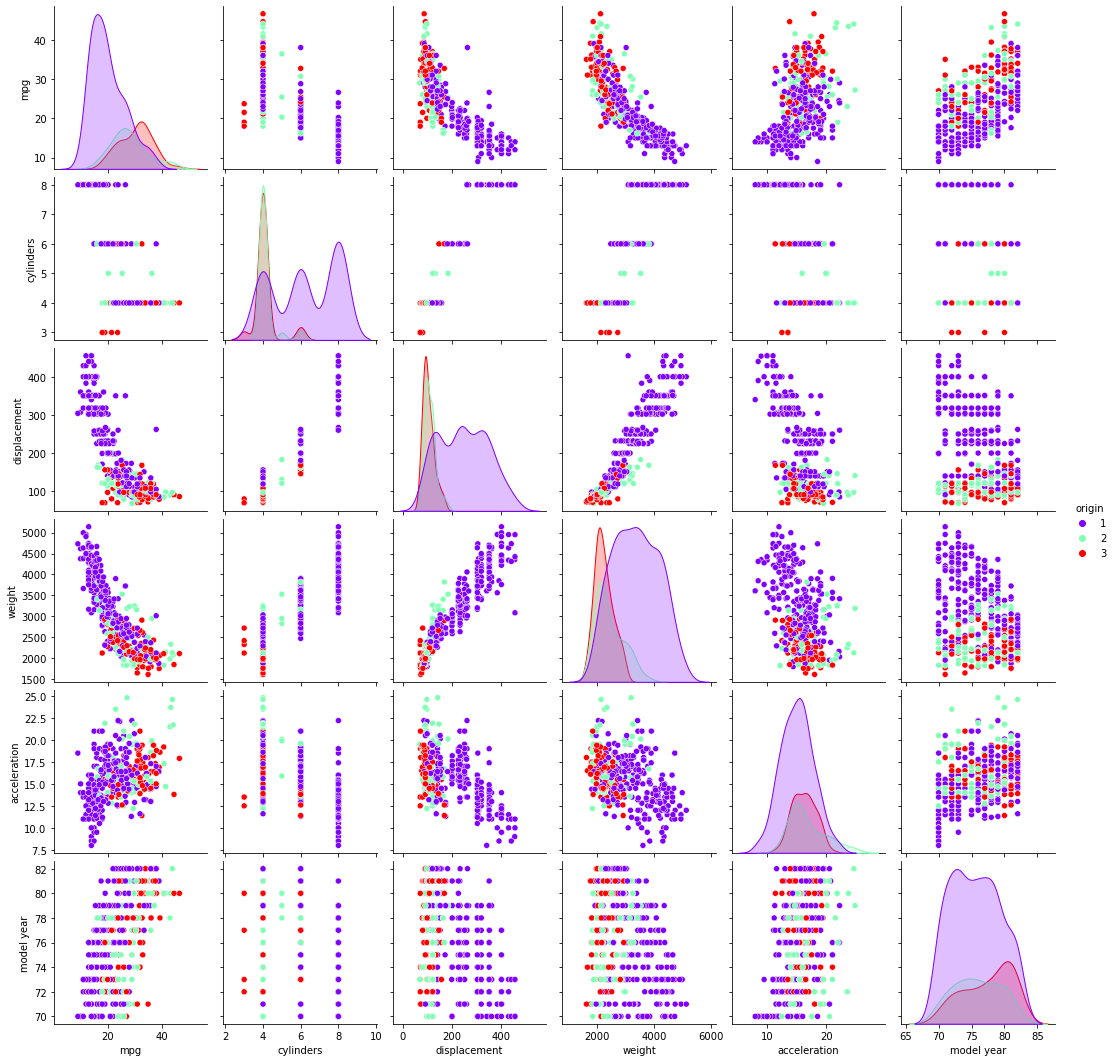

In [119]:
sns.pairplot(df_auto, hue='origin', palette='rainbow')
# 대각선에 히스토그램 살리고 싶으시면 인자값에 diag_kind ='hist' 넣기 

In [120]:
import numpy as np
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,6,6,7,3,8,10])

<AxesSubplot:ylabel='Count'>

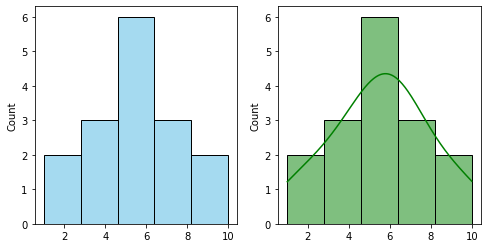

In [124]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#하나의 표를 한 열에 같이 보이게 하기 

sns.histplot(fish_data, color='skyblue', kde = False, ax=ax1)
sns.histplot(fish_data, color='green', kde = True, ax=ax2)

In [ ]:
# 시각화 복습할 것 